In [ ]:
#df = pd.read_csv('Data/imp_feat_h1n1_bal.csv')

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn.cluster import KMeans
import seaborn as sns

In [2]:
features = pd.read_csv('Data/imputed_train_hot_encoded.csv')
features.rename(columns={"Unnamed: 0": "respondent_id"}, inplace=True)
cols = list(features.columns)
for col in cols:
    features[col] = features[col].astype(int)

In [3]:
regions = ['bhuqouqj', 'dqpwygqj', 'fpwskwrf', 'lzgpxyit', 'qufhixun',  
           'kbazzjca', 'atmpeygn', 'oxchjgsf', 'mlyzmhmf', 'lrircsnp']

In [4]:
for i, region in enumerate(regions):
    features.loc[features[region]==1, 'hhs_geo_region'] = i

/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


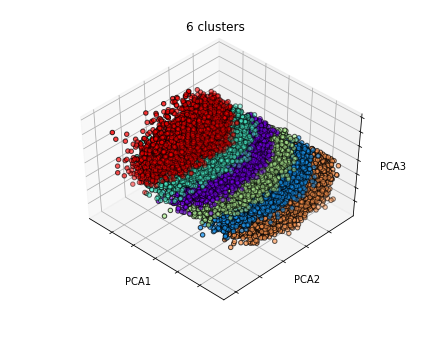

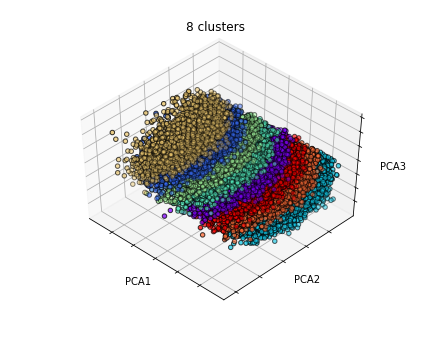

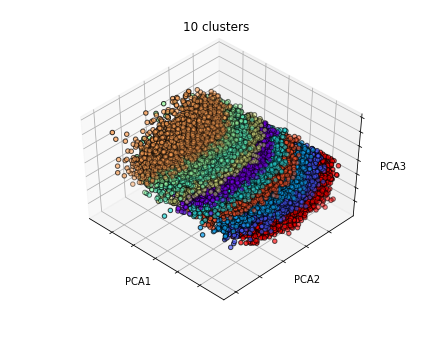

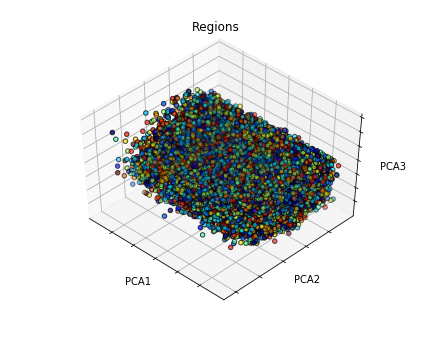

In [6]:
np.random.seed(5)

X = features.sort_values(by='respondent_id').drop(columns='hhs_geo_region').to_numpy()
y = features['hhs_geo_region']

pca = decomposition.PCA(n_components=3)
pca.fit(X)
tX = pca.transform(X)

estimators = [('k_means_iris_6', KMeans(n_clusters=6)),
              ('k_means_iris_8', KMeans(n_clusters=8)),
              ('k_means_iris_10', KMeans(n_clusters=10, n_init=1,
                                               init='random'))]

fignum = 1
titles = ['6 clusters', '8 clusters', '10 clusters']
for name, est in estimators:
    fig = plt.figure(fignum, figsize=(6, 4.5))
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    est.fit(X)
    labels = est.labels_

    ax.scatter(tX[:, 0], tX[:, 1], tX[:, 2], 
        c=labels.astype(np.float), cmap='rainbow', edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('PCA1')
    ax.set_ylabel('PCA2')
    ax.set_zlabel('PCA3')
    ax.set_title(titles[fignum - 1])
    ax.dist = 12
    fignum = fignum + 1

# Plot the ground truth
fig = plt.figure(fignum, figsize=(6, 4.5))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    
# Reorder the labels to have colors matching the cluster results
#y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(tX[:, 0], tX[:, 1], tX[:, 2], cmap=plt.cm.get_cmap("jet", 10) ,c=y, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('PCA1')
ax.set_ylabel('PCA2')
ax.set_zlabel('PCA3')
ax.set_title('Regions')
ax.dist = 12

fig.show()